# Usecase_1: Prediction of credit worthiness

# Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Extraction 

In [2]:
data=pd.read_csv('share_CID.csv')
data.head()

,CUSTOMER_ID,INVOICE_DATE,PAYMENT_TERMS,AMOUNT,CUSTOMER_TYPE,OUTLET_TYPE,OUTLET_SUB_TYPE,DEFAULT_PAYMENT_METHOD,PAYMENT_METHOD,REGION_NAME,...,STATE,DELAY_MIN_30D,DELAY_MAX_30D,DIFF_DAYS_LAST_INVOICE,IS_INVOICE_PRESENT_IN_15D,AVG_DIFF_BETWEEN_2_INVOICES_30D,AVG_DELAY_30D,PREV_DELAY,STD_DELAY_30D,IS_DELINQUENT
0,AA1,11-04-2020,7,625.40,J,A1,BB1,B1,CC1,C1,...,F1,6,7,7,1,5.600000,6.400000,6,0.547723,0
1,AA2,09-08-2020,7,1542.40,J,A1,BB1,B1,CC1,C2,...,F2,1,7,7,1,8.400000,2.200000,1,2.683282,0
2,AA3,08-06-2020,7,461.16,J,A2,BB2,B1,CC1,C2,...,F2,0,1,8,1,7.666667,0.666667,1,0.577350,0
3,AA4,3/24/2020,0,3493.13,F,A2,BB2,B1,CC1,C3,...,F3,0,0,7,1,0.000000,0.000000,0,0.000000,0
4,AA5,12-05-2020,7,193.44,F,A2,BB2,B1,CC1,C3,...,F4,0,0,50,0,0.000000,0.000000,4,0.000000,0


In [3]:
#checking for shape of data
data.shape

(107973, 24)

# Data Preprocessing

In [4]:
#checking for missing values
print("Missing values in This dataset {}".format(data.isnull().sum()))

Missing values in This dataset CUSTOMER_ID                           0
INVOICE_DATE                          0
PAYMENT_TERMS                         0
AMOUNT                                0
CUSTOMER_TYPE                         0
OUTLET_TYPE                          87
OUTLET_SUB_TYPE                      45
DEFAULT_PAYMENT_METHOD                0
PAYMENT_METHOD                        0
REGION_NAME                         856
AREA_CODE                             0
TERRITORY_TYPE                        0
DIVISION                              0
CATEGORIES_SOLD                       0
STATE                              3436
DELAY_MIN_30D                         0
DELAY_MAX_30D                         0
DIFF_DAYS_LAST_INVOICE                0
IS_INVOICE_PRESENT_IN_15D             0
AVG_DIFF_BETWEEN_2_INVOICES_30D       0
AVG_DELAY_30D                         0
PREV_DELAY                            0
STD_DELAY_30D                         0
IS_DELINQUENT                         0
dtype: in

In [5]:
#Handling missing values by removing as it is less then 5 %
data=data.dropna()
print("Missing values in This dataset {}".format(data.isnull().sum()))
#After removing null values shape of data
data.shape

Missing values in This dataset CUSTOMER_ID                        0
INVOICE_DATE                       0
PAYMENT_TERMS                      0
AMOUNT                             0
CUSTOMER_TYPE                      0
OUTLET_TYPE                        0
OUTLET_SUB_TYPE                    0
DEFAULT_PAYMENT_METHOD             0
PAYMENT_METHOD                     0
REGION_NAME                        0
AREA_CODE                          0
TERRITORY_TYPE                     0
DIVISION                           0
CATEGORIES_SOLD                    0
STATE                              0
DELAY_MIN_30D                      0
DELAY_MAX_30D                      0
DIFF_DAYS_LAST_INVOICE             0
IS_INVOICE_PRESENT_IN_15D          0
AVG_DIFF_BETWEEN_2_INVOICES_30D    0
AVG_DELAY_30D                      0
PREV_DELAY                         0
STD_DELAY_30D                      0
IS_DELINQUENT                      0
dtype: int64


(103671, 24)

In [6]:
#checkc duplicate values
print(data.duplicated().sum())
duplicate = data[data.duplicated()]
duplicate

1


,CUSTOMER_ID,INVOICE_DATE,PAYMENT_TERMS,AMOUNT,CUSTOMER_TYPE,OUTLET_TYPE,OUTLET_SUB_TYPE,DEFAULT_PAYMENT_METHOD,PAYMENT_METHOD,REGION_NAME,...,STATE,DELAY_MIN_30D,DELAY_MAX_30D,DIFF_DAYS_LAST_INVOICE,IS_INVOICE_PRESENT_IN_15D,AVG_DIFF_BETWEEN_2_INVOICES_30D,AVG_DELAY_30D,PREV_DELAY,STD_DELAY_30D,IS_DELINQUENT
45494,AA35977,8/19/2020,0,506.15,F,A5,BB6,B2,CC1,C1,...,F1,0,0,0,1,0.0,0.0,0,0.0,0


(array([1.03596e+05, 4.50000e+01, 1.20000e+01, 9.00000e+00, 4.00000e+00,
        2.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1.44000000e+00, 4.70407160e+04, 9.40799920e+04, 1.41119268e+05,
        1.88158544e+05, 2.35197820e+05, 2.82237096e+05, 3.29276372e+05,
        3.76315648e+05, 4.23354924e+05, 4.70394200e+05]),
 <BarContainer object of 10 artists>)

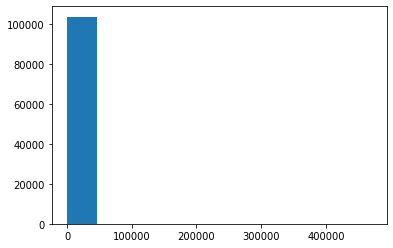

In [7]:
import matplotlib.pyplot as plt
plt.hist(data['AMOUNT'])

Amount is not normally distributed so using log function to convert into normal/Gaussian distribution

(array([5.0000e+00, 6.8000e+01, 2.9850e+03, 1.5242e+04, 4.1110e+04,
        3.3658e+04, 9.8470e+03, 6.5500e+02, 8.0000e+01, 2.1000e+01]),
 array([ 0.52606881,  2.35781301,  4.1895572 ,  6.02130139,  7.85304559,
         9.68478978, 11.51653397, 13.34827817, 15.18002236, 17.01176655,
        18.84351075]),
 <BarContainer object of 10 artists>)

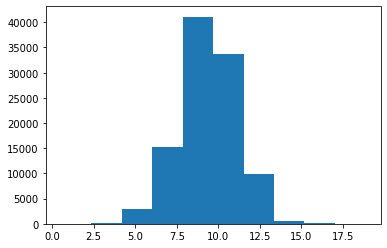

In [8]:
#Log function
data['AMOUNT'] = np.log2(data['AMOUNT'])
plt.hist(data['AMOUNT'])

Seperating numerical and categorical columns

In [9]:
cols = data.columns
num_cols= data._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

Numeric columns

In [10]:
data[num_cols]

,PAYMENT_TERMS,AMOUNT,DELAY_MIN_30D,DELAY_MAX_30D,DIFF_DAYS_LAST_INVOICE,IS_INVOICE_PRESENT_IN_15D,AVG_DIFF_BETWEEN_2_INVOICES_30D,AVG_DELAY_30D,PREV_DELAY,STD_DELAY_30D,IS_DELINQUENT
0,7,9.288635,6,7,7,1,5.600000,6.400000,6,0.547723,0
1,7,10.590961,1,7,7,1,8.400000,2.200000,1,2.683282,0
2,7,8.849124,0,1,8,1,7.666667,0.666667,1,0.577350,0
3,0,11.770305,0,0,7,1,0.000000,0.000000,0,0.000000,0
4,7,7.595742,0,0,50,0,0.000000,0.000000,4,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
107968,7,9.602532,7,8,7,1,6.000000,7.600000,7,0.547723,0
107969,7,8.220040,0,0,0,0,0.000000,0.000000,0,0.000000,0
107970,7,9.760570,-7,-1,6,1,5.600000,-2.600000,-2,2.509980,0
107971,7,8.746078,1,2,14,1,7.000000,1.333333,2,0.577350,0


Categroical columns

In [11]:
data[cat_cols]

,CUSTOMER_ID,AREA_CODE,PAYMENT_METHOD,DIVISION,OUTLET_SUB_TYPE,OUTLET_TYPE,CUSTOMER_TYPE,TERRITORY_TYPE,REGION_NAME,INVOICE_DATE,DEFAULT_PAYMENT_METHOD,CATEGORIES_SOLD,STATE
0,AA1,N1,CC1,EE1,BB1,A1,J,DD1,C1,11-04-2020,B1,E1,F1
1,AA2,N2,CC1,EE2,BB1,A1,J,DD2,C2,09-08-2020,B1,E1,F2
2,AA3,N3,CC1,EE2,BB2,A2,J,DD2,C2,08-06-2020,B1,E1,F2
3,AA4,N4,CC1,EE3,BB2,A2,F,DD1,C3,3/24/2020,B1,E1,F3
4,AA5,N5,CC1,EE3,BB2,A2,F,DD1,C3,12-05-2020,B1,E1,F4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107968,AA17409,N1,CC1,EE1,BB11,A8,J,DD1,C1,05-11-2020,B1,E1,F1
107969,AA76906,N33,CC1,EE1,BB3,A3,J,DD1,C1,4/25/2020,B1,E1,F1
107970,AA76907,N4,CC1,EE3,BB5,A4,F,DD1,C3,12/22/2020,B1,E1,F3
107971,AA13298,N9,CC1,EE4,BB3,A3,F,DD1,C4,6/17/2020,B1,E1,F7


# EDA

visualization for numeric columns

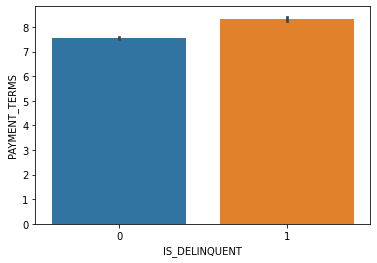

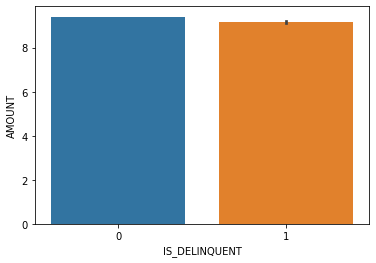

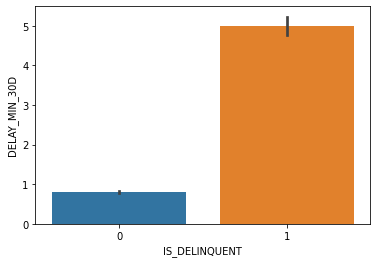

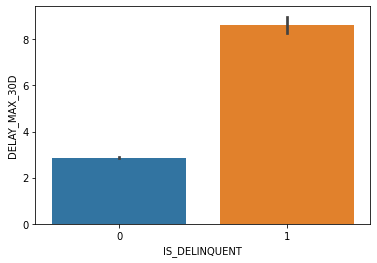

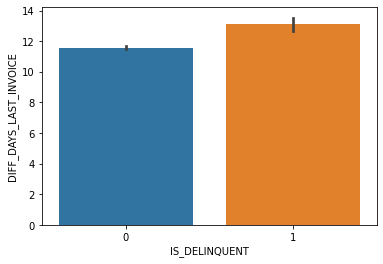

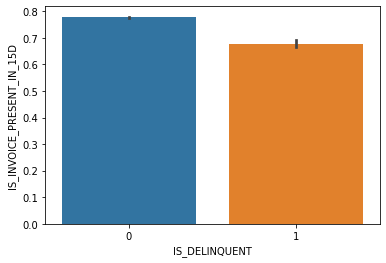

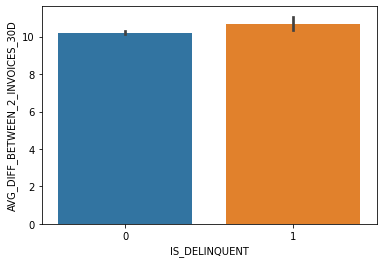

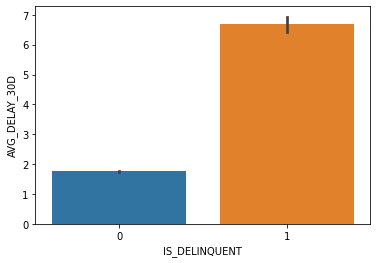

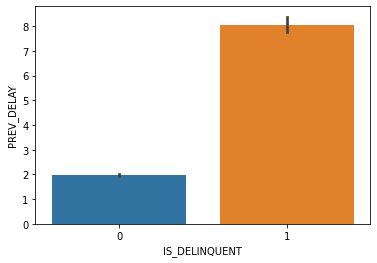

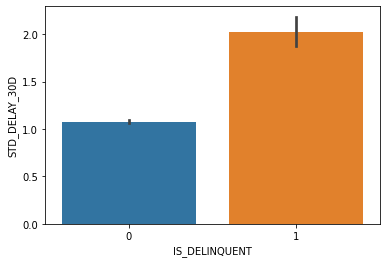

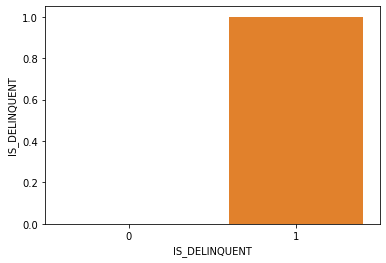

In [12]:
for i in data[num_cols]:
    sns.barplot(data.IS_DELINQUENT,data[i])
    plt.show()

visualization for catagorical data

In [14]:
new_cat=data[cat_cols].drop(['CUSTOMER_ID'], axis=1)

In [15]:
new_cat

,AREA_CODE,PAYMENT_METHOD,DIVISION,OUTLET_SUB_TYPE,OUTLET_TYPE,CUSTOMER_TYPE,TERRITORY_TYPE,REGION_NAME,INVOICE_DATE,DEFAULT_PAYMENT_METHOD,CATEGORIES_SOLD,STATE
0,N1,CC1,EE1,BB1,A1,J,DD1,C1,11-04-2020,B1,E1,F1
1,N2,CC1,EE2,BB1,A1,J,DD2,C2,09-08-2020,B1,E1,F2
2,N3,CC1,EE2,BB2,A2,J,DD2,C2,08-06-2020,B1,E1,F2
3,N4,CC1,EE3,BB2,A2,F,DD1,C3,3/24/2020,B1,E1,F3
4,N5,CC1,EE3,BB2,A2,F,DD1,C3,12-05-2020,B1,E1,F4
...,...,...,...,...,...,...,...,...,...,...,...,...
107968,N1,CC1,EE1,BB11,A8,J,DD1,C1,05-11-2020,B1,E1,F1
107969,N33,CC1,EE1,BB3,A3,J,DD1,C1,4/25/2020,B1,E1,F1
107970,N4,CC1,EE3,BB5,A4,F,DD1,C3,12/22/2020,B1,E1,F3
107971,N9,CC1,EE4,BB3,A3,F,DD1,C4,6/17/2020,B1,E1,F7


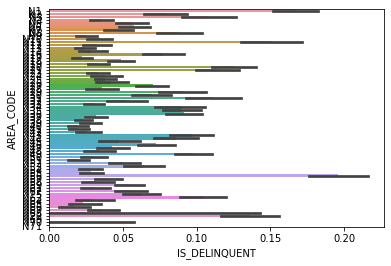

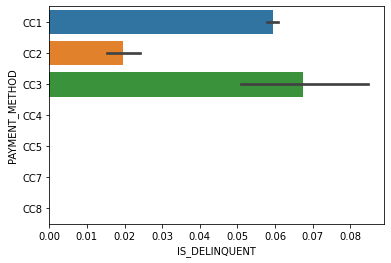

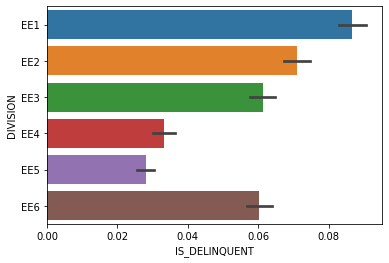

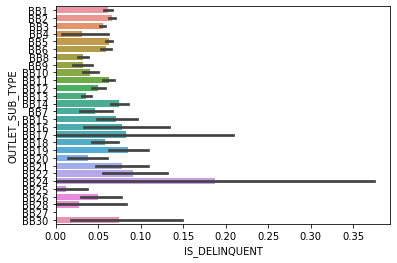

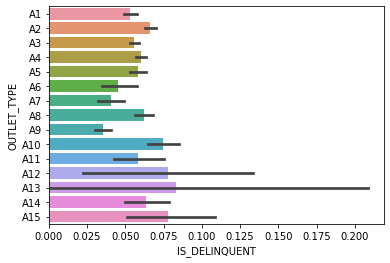

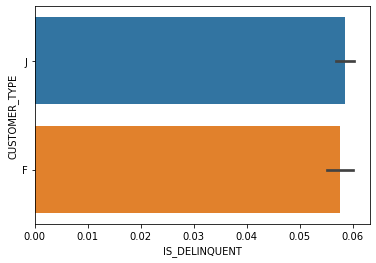

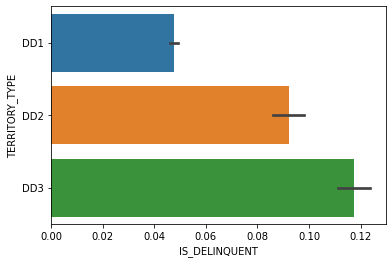

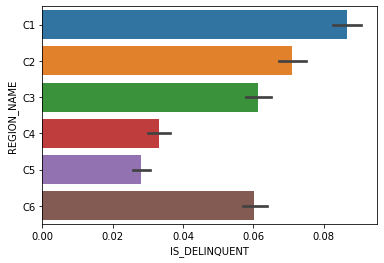

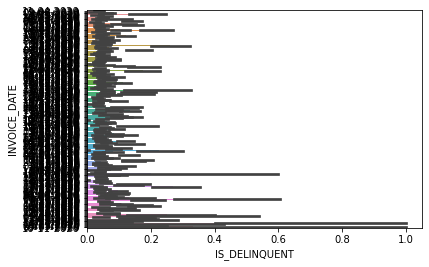

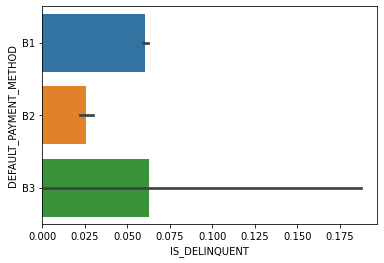

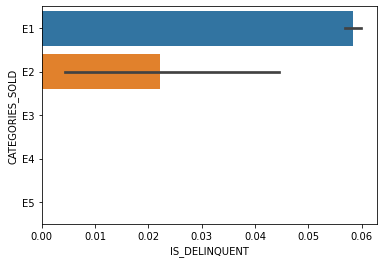

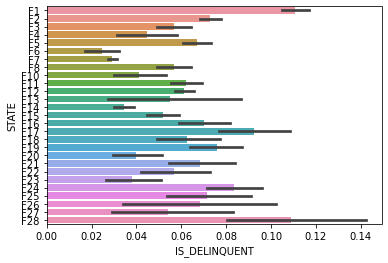

In [16]:
for i in new_cat:
    sns.barplot(data.IS_DELINQUENT,data[i])
    plt.show()

In [17]:
#Encoding categorical features
from sklearn.preprocessing import LabelEncoder
data1 = data[cat_cols].apply(LabelEncoder().fit_transform)
data1

,CUSTOMER_ID,AREA_CODE,PAYMENT_METHOD,DIVISION,OUTLET_SUB_TYPE,OUTLET_TYPE,CUSTOMER_TYPE,TERRITORY_TYPE,REGION_NAME,INVOICE_DATE,DEFAULT_PAYMENT_METHOD,CATEGORIES_SOLD,STATE
0,0,0,0,0,0,0,1,0,0,91,0,0,0
1,10638,11,0,1,0,0,1,1,1,57,0,0,11
2,21259,22,0,1,11,7,1,1,1,45,0,0,11
3,31893,33,0,2,11,7,0,0,2,148,0,0,21
4,42503,44,0,2,11,7,0,0,2,118,0,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107968,7871,0,0,0,2,13,1,0,0,18,0,0,0
107969,70947,26,0,0,20,8,1,0,0,166,0,0,0
107970,70948,33,0,2,23,9,0,0,2,133,0,0,21
107971,3501,69,0,3,20,8,0,0,3,191,0,0,25


In [18]:
main_data = data1.join(data[num_cols])
main_data

,CUSTOMER_ID,AREA_CODE,PAYMENT_METHOD,DIVISION,OUTLET_SUB_TYPE,OUTLET_TYPE,CUSTOMER_TYPE,TERRITORY_TYPE,REGION_NAME,INVOICE_DATE,...,AMOUNT,DELAY_MIN_30D,DELAY_MAX_30D,DIFF_DAYS_LAST_INVOICE,IS_INVOICE_PRESENT_IN_15D,AVG_DIFF_BETWEEN_2_INVOICES_30D,AVG_DELAY_30D,PREV_DELAY,STD_DELAY_30D,IS_DELINQUENT
0,0,0,0,0,0,0,1,0,0,91,...,9.288635,6,7,7,1,5.600000,6.400000,6,0.547723,0
1,10638,11,0,1,0,0,1,1,1,57,...,10.590961,1,7,7,1,8.400000,2.200000,1,2.683282,0
2,21259,22,0,1,11,7,1,1,1,45,...,8.849124,0,1,8,1,7.666667,0.666667,1,0.577350,0
3,31893,33,0,2,11,7,0,0,2,148,...,11.770305,0,0,7,1,0.000000,0.000000,0,0.000000,0
4,42503,44,0,2,11,7,0,0,2,118,...,7.595742,0,0,50,0,0.000000,0.000000,4,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107968,7871,0,0,0,2,13,1,0,0,18,...,9.602532,7,8,7,1,6.000000,7.600000,7,0.547723,0
107969,70947,26,0,0,20,8,1,0,0,166,...,8.220040,0,0,0,0,0.000000,0.000000,0,0.000000,0
107970,70948,33,0,2,23,9,0,0,2,133,...,9.760570,-7,-1,6,1,5.600000,-2.600000,-2,2.509980,0
107971,3501,69,0,3,20,8,0,0,3,191,...,8.746078,1,2,14,1,7.000000,1.333333,2,0.577350,0


# Correlation Matrix

,CUSTOMER_ID,AREA_CODE,PAYMENT_METHOD,DIVISION,OUTLET_SUB_TYPE,OUTLET_TYPE,CUSTOMER_TYPE,TERRITORY_TYPE,REGION_NAME,INVOICE_DATE,...,AMOUNT,DELAY_MIN_30D,DELAY_MAX_30D,DIFF_DAYS_LAST_INVOICE,IS_INVOICE_PRESENT_IN_15D,AVG_DIFF_BETWEEN_2_INVOICES_30D,AVG_DELAY_30D,PREV_DELAY,STD_DELAY_30D,IS_DELINQUENT
CUSTOMER_ID,1.000000,-0.001245,-0.000002,0.002445,-0.000413,0.003467,-0.000479,0.019810,0.002445,-0.002035,...,-0.020577,0.008775,-0.005718,0.035646,-0.042764,0.017658,0.000694,0.009719,-0.008411,0.003731
AREA_CODE,-0.001245,1.000000,-0.015748,-0.006561,-0.008832,-0.020647,0.010587,0.009833,-0.006561,0.000631,...,0.044898,-0.028363,-0.018056,-0.006689,0.002728,-0.004721,-0.027277,-0.021422,-0.002315,-0.025040
PAYMENT_METHOD,-0.000002,-0.015748,1.000000,-0.014302,0.084897,0.034165,-0.090442,0.001949,-0.014302,-0.001866,...,-0.059281,-0.007473,-0.025325,-0.007878,-0.000876,-0.010375,-0.021771,-0.018828,-0.022758,-0.017980
DIVISION,0.002445,-0.006561,-0.014302,1.000000,0.063663,-0.031540,-0.114816,-0.156189,1.000000,-0.001968,...,0.056971,-0.088844,-0.069078,-0.001873,-0.000383,-0.005478,-0.091020,-0.077837,-0.012620,-0.062626
OUTLET_SUB_TYPE,-0.000413,-0.008832,0.084897,0.063663,1.000000,0.125593,-0.369781,-0.057761,0.063663,-0.003488,...,-0.180384,-0.039967,-0.021192,-0.002050,-0.007513,0.004127,-0.032676,-0.024324,0.007974,-0.004283
OUTLET_TYPE,0.003467,-0.020647,0.034165,-0.031540,0.125593,1.000000,0.011643,0.065290,-0.031540,-0.004275,...,0.004287,0.006536,-0.007758,0.002819,-0.002885,0.009735,0.000020,0.001861,-0.011403,-0.008719
CUSTOMER_TYPE,-0.000479,0.010587,-0.090442,-0.114816,-0.369781,0.011643,1.000000,0.061417,-0.114816,-0.000563,...,0.079516,0.017906,0.012433,0.003039,0.000831,0.000437,0.015445,0.012681,-0.000660,0.001834
TERRITORY_TYPE,0.019810,0.009833,0.001949,-0.156189,-0.057761,0.065290,0.061417,1.000000,-0.156189,-0.002304,...,-0.063612,0.145447,0.109845,0.078087,-0.081349,0.032942,0.149576,0.136854,0.019329,0.097547
REGION_NAME,0.002445,-0.006561,-0.014302,1.000000,0.063663,-0.031540,-0.114816,-0.156189,1.000000,-0.001968,...,0.056971,-0.088844,-0.069078,-0.001873,-0.000383,-0.005478,-0.091020,-0.077837,-0.012620,-0.062626
INVOICE_DATE,-0.002035,0.000631,-0.001866,-0.001968,-0.003488,-0.004275,-0.000563,-0.002304,-0.001968,1.000000,...,-0.004119,-0.018369,-0.017357,-0.010375,0.024359,0.025475,-0.020655,-0.016335,-0.006753,-0.003125


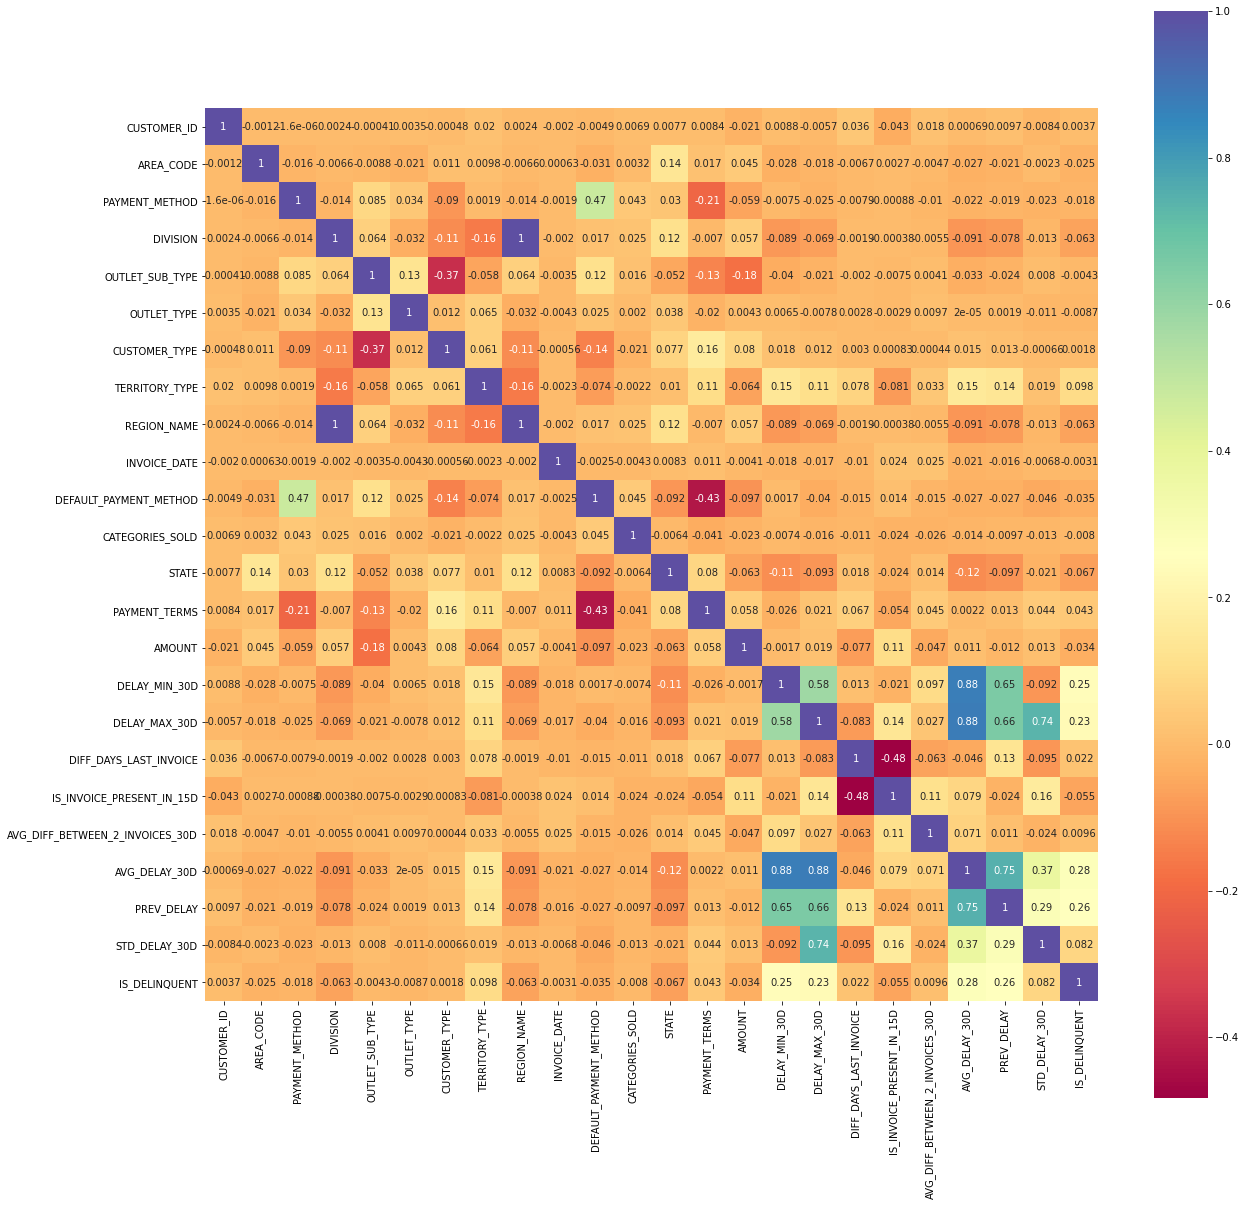

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(main_data.corr(),square=True,annot=True,cmap= 'Spectral')
main_data.corr()

In [20]:
main_data['IS_DELINQUENT'].value_counts()

0    97636
1     6035
Name: IS_DELINQUENT, dtype: int64

94% data is from class 0 & only 6% is from class 1 so we can clearly understand that data is imbalanced for classification and can impact our model performance so first we need to make it balance by using oversamoling technique SMOTE 

In [21]:
#selecting Target & Predictor variable
X = main_data.drop('IS_DELINQUENT',axis=1)
y = main_data['IS_DELINQUENT']

# Model Building & Evaluation

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [23]:
#splitting of data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)

In [24]:
#SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_sm,y_sm =sm.fit_resample(X_train,y_train)

print(f'''Shape of X_train before Smote:{X_train.shape}
Shape of X_train after Smote:{X_sm.shape}''')

print('\n Balanced of Positive and Negative class percent')
y_sm.value_counts(normalize=True)*100

Shape of X_train before Smote:(72569, 23)
Shape of X_train after Smote:(136704, 23)

 Balanced of Positive and Negative class percent


0    50.0
1    50.0
Name: IS_DELINQUENT, dtype: float64

Logistic Regression Model

In [32]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_sm,y_sm)
y_pred = lr.predict(X_test)

print('Report:\n',classification_report(y_test, y_pred))
print('confusion Matrix:\n',confusion_matrix(y_pred,y_test))
print('cross validation:',cross_val_score(lr, X, y, cv=5))
print('ROC_AUC Score:',roc_auc_score(y_test, y_pred))

Report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.90     29284
           1       0.17      0.56      0.26      1818

    accuracy                           0.82     31102
   macro avg       0.57      0.69      0.58     31102
weighted avg       0.92      0.82      0.86     31102

confusion Matrix:
 [[24391   807]
 [ 4893  1011]]
cross validation: [0.94299494 0.94246166 0.94400502 0.94308865 0.94279927]
ROC_AUC Score: 0.6945088905147856


Decision Tree Model

In [33]:
dtree=DecisionTreeClassifier()
dtree.fit(X_sm,y_sm)
print('Decision Tree Classifier Created')
y2_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y2_pred))
print('confusion Matrix:\n',confusion_matrix(y2_pred,y_test))
print('ROC_AUC Score:',roc_auc_score(y_test, y2_pred))

Decision Tree Classifier Created
Classification report - 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94     29284
           1       0.20      0.33      0.25      1818

    accuracy                           0.88     31102
   macro avg       0.58      0.62      0.59     31102
weighted avg       0.91      0.88      0.90     31102

confusion Matrix:
 [[26859  1214]
 [ 2425   604]]
ROC_AUC Score: 0.6247117489374945


Random Forest Model

In [34]:
#use not more than 50 trees, and control the depth of the trees to prevent overfitting
rfc = RandomForestClassifier()
rfc.fit(X_sm,y_sm)
y1_pred = rfc.predict(X_test)

print('Report:\n',classification_report(y_test, y1_pred))
print('confusion Matrix:\n',confusion_matrix(y1_pred,y_test))
print('cross validation:',cross_val_score(rfc, X, y, cv=5))
print('ROC_AUC Score:',roc_auc_score(y_test, y1_pred))

Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     29284
           1       0.39      0.29      0.34      1818

    accuracy                           0.93     31102
   macro avg       0.67      0.63      0.65     31102
weighted avg       0.92      0.93      0.93     31102

confusion Matrix:
 [[28456  1285]
 [  828   533]]
cross validation: [0.94820352 0.94699527 0.94713996 0.94670589 0.94627182]
ROC_AUC Score: 0.6324522460441646


XGboost Model

In [38]:
from warnings import simplefilter
from xgboost import XGBClassifier
simplefilter(action='ignore', category=FutureWarning)
xgb = XGBClassifier()
xgb.fit(X_sm,y_sm)
y0_pred = xgb.predict(X_test)

print('Report:\n',classification_report(y_test, y0_pred))
print('confusion Matrix:\n',confusion_matrix(y0_pred,y_test))
print('cross validation:',cross_val_score(xgb, X, y, cv=5))
print('ROC_AUC Score:',roc_auc_score(y_test, y0_pred))



[19:04:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     29284
           1       0.47      0.25      0.33      1818

    accuracy                           0.94     31102
   macro avg       0.71      0.62      0.65     31102
weighted avg       0.93      0.94      0.93     31102

confusion Matrix:
 [[28771  1357]
 [  513   461]]
[19:04:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old beha

In [28]:
#Compare Actual and predicted values:
dff= pd.DataFrame({'Actual': y_test,'Predicted': y0_pred})
dff.tail(20)

,Actual,Predicted
59407,0,0
14266,0,0
13594,0,0
23894,0,0
38494,0,0
60546,0,0
26291,0,0
87870,0,0
39479,0,0
17755,0,0


Text(0, 0.5, 'IS_DELINQUENT')

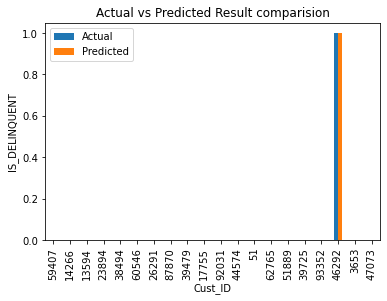

In [29]:
#Visualisation of Actual vs Predicted values
dff.tail(20).plot(kind='bar')
plt.title("Actual vs Predicted Result comparision")
plt.xlabel("Cust_ID")
plt.ylabel("IS_DELINQUENT")

Note:-
Evaluation Matrix-I have used Accuracy,Precision,Recall,F1_Score & Confusion Matrix for model evaluation.As data is imbalanced so instead of pointing True Positive & True Negative,will have to point False Positive & False Negative measures and F1_Score is Harmonic Mean of Precision,Recall so F1_Score will be best measure of model evaluation in this case.

As per F1_Score we can say that xgboost model has performed better among other models like Decision Tree,Random Forest and Logistic Regression.

Feature Importance Visualization

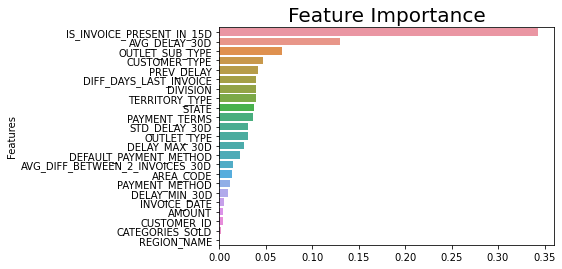

In [30]:
importances=xgb.feature_importances_
feature_importances=pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances[0:24],y=feature_importances.index[0:24])
plt.title('Feature Importance',size=20)
plt.ylabel("Features")
plt.show()